# P03_03_LSTM


In [1]:
section_fig_main_title = 'P03_03_LSTM_'

In [2]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [3]:
import sys
# print(sys.executable)

In [4]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install matplotlib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [6]:
%config InlineBackend.figure_format = 'retina'

In [155]:
import gif
from tqdm import tqdm

In [7]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

### Read data

In [9]:
csv_path = "../Data/jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path, index_col=0, parse_dates=True)

In [10]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1 MB


In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error

In [13]:
# # Some functions to help out with
# def plot_predictions(test,predicted):
#     plt.plot(test, color='red',label='test')
#     plt.plot(predicted, color='blue',label='Predicted')
#     plt.title('Prediction')
#     plt.xlabel('Date')
#     plt.ylabel('temp')
#     plt.legend()
#     plt.show()

# def return_rmse(test,predicted):
#     rmse = math.sqrt(mean_squared_error(test, predicted))
#     print("The root mean squared error is {}.".format(rmse))

### Set data parameters

In [14]:
# use first 20000 timestamps for training 
size_of_training = 20000

In [15]:
# df['T (degC)'].tail

In [16]:
# first row of data
# df['T (degC)'][0:1]

In [17]:
df['T (degC)'][0:1].index[0]

Timestamp('2009-01-01 00:10:00')

In [18]:
# set the start of training row date
train_start = df['T (degC)'][0:1].index[0]
train_start = str(train_start)
train_start

'2009-01-01 00:10:00'

In [19]:
a = df['T (degC)'][0:1].index[0]
str(a)

'2009-01-01 00:10:00'

In [20]:
# last row of data
# df['T (degC)'][(size_of_training-1):size_of_training]

In [21]:
# set the end of training row date
train_end = df['T (degC)'][(size_of_training-1):size_of_training].index[0]
train_end = str(train_end)
train_end

'2009-05-19 21:20:00'

In [22]:
# use last 60 time stamps for prediction
lags = 60

I seperate the next 720 time stamps for prediction however I need to include the number of lags nessaccary to the test data set. keep that in mind I need to seperate the data from main data set from the row 20000 to 20760, However I have to subtract the 20000 from 60 (lag time stamps) which later I would need for predicting the first row of data set.

Let's find the date of the first row of test dat set.

In [23]:
next_timestamps_test_num = 760

In [24]:
print(size_of_training-lags)

19940


So the test data set row begin from row number 19940. let's check out the date asigned to row 19940.

In [25]:
df['T (degC)'][19939:19940].index[0]

Timestamp('2009-05-19 11:20:00')

In [26]:
test_start = df['T (degC)'][(size_of_training-lags-1):(size_of_training-lags)].index[0]
test_start = str(test_start)
test_start

'2009-05-19 11:20:00'

test data set should come to end at 20760. lets check out the date asigned to row 20760.

In [27]:
df['T (degC)'][20759:20760].index[0]

Timestamp('2009-05-25 04:00:00')

In [28]:
# size_of_training+next_timestamps_test_num-1

In [29]:
# size_of_training+next_timestamps_test_num

In [30]:
test_end = df['T (degC)'][(size_of_training+next_timestamps_test_num-1):(size_of_training+next_timestamps_test_num)].index[0]
test_end = str(test_end)
test_end

'2009-05-25 04:00:00'

In [31]:
# test_end

In [32]:
# train_start = '2009-01-01 00:10:00'
# train_end = '2009-05-19 21:20:00'

# test_start = '2009-05-19 21:30:00'
# test_end = '2009-05-24 21:20:00'

In [33]:
training_set = df['T (degC)'][train_start:train_end]
test_set = df['T (degC)'][test_start:test_end]

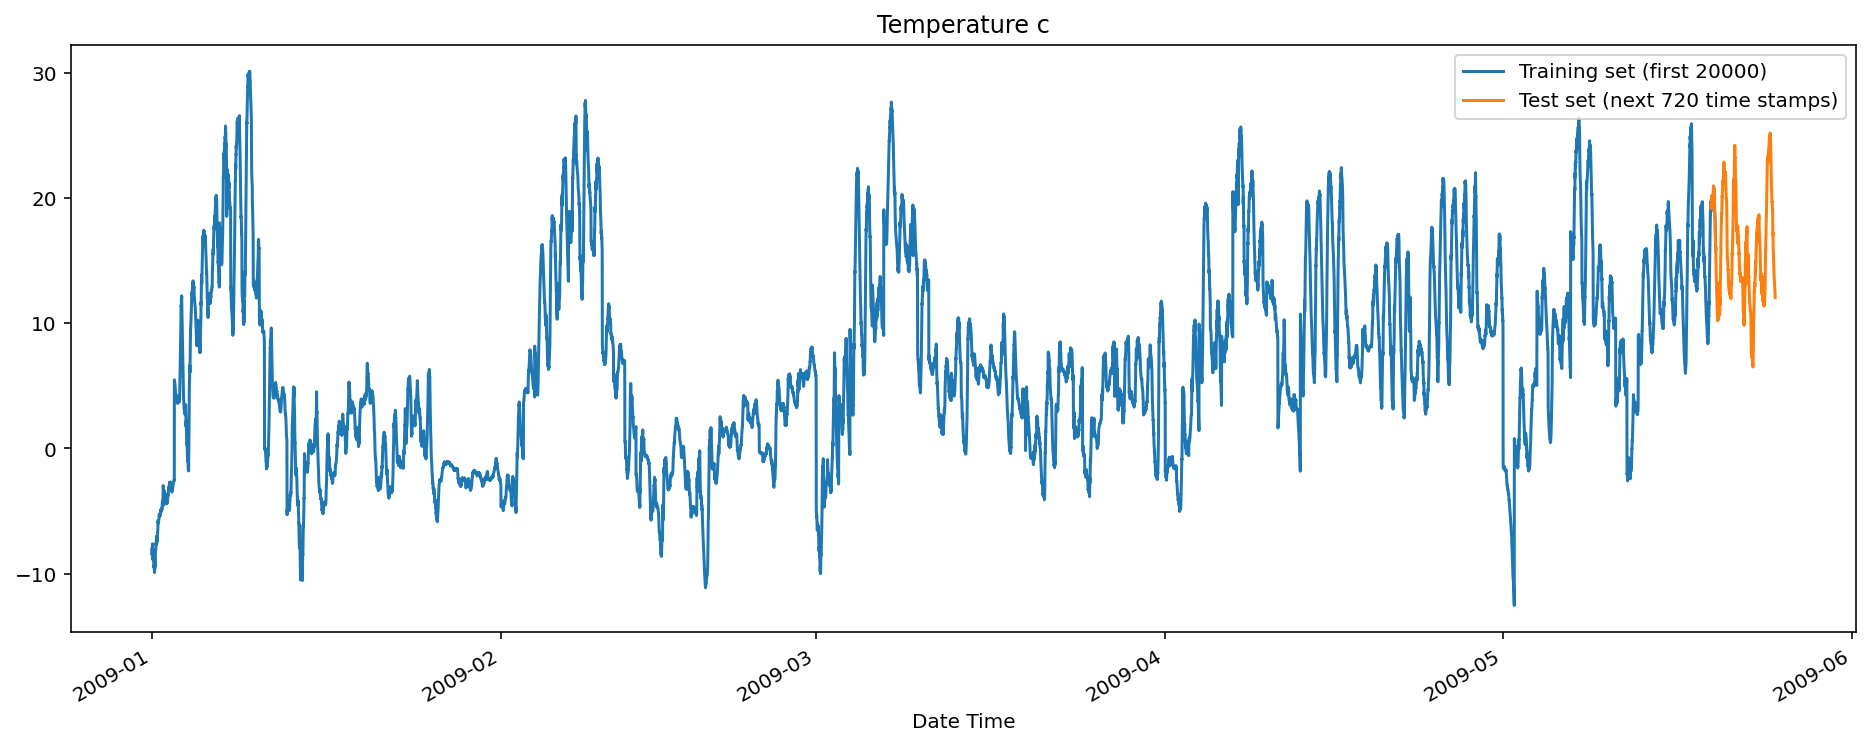

In [34]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
training_set.plot(figsize=(16,6),legend=True)
test_set.plot(figsize=(16,6),legend=True)
plt.legend(['Training set (first 20000)','Test set (next 720 time stamps)'])
plt.title('Temperature c')
plt.show()

### Preparing train data set

In [35]:
# training_set.values
training_set_np = np.array(training_set)
# training_set_np
training_set_np = training_set_np.reshape(-1,1)
# training_set_np

In [36]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set_np)

In [37]:
# training_set_scaled

In [38]:
training_set_scaled.size

20000

lets use 60 timestamps for pridction next timestamp. 

In [39]:
X_train = []
y_train = []

num_use_past_data = lags # 60
size_of_training = training_set_scaled.size 



for i in range(num_use_past_data, size_of_training):
    X_train.append(training_set_scaled[i-num_use_past_data:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [40]:
X_train.shape

(19940, 60)

In [41]:
y_train.shape

(19940,)

In [42]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## LSTM 

In [63]:
# lstm source https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', 
                  loss='mean_squared_error')


In [64]:
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_20 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 50)               

In [65]:
# Fitting to the training set
history = regressor.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
624/624 [==============================] - 41s 58ms/step - loss: 0.0061
Epoch 2/5
624/624 [==============================] - 35s 57ms/step - loss: 0.0021
Epoch 3/5
624/624 [==============================] - 35s 57ms/step - loss: 0.0015
Epoch 4/5
624/624 [==============================] - 35s 56ms/step - loss: 0.0011
Epoch 5/5
624/624 [==============================] - 35s 55ms/step - loss: 9.3377e-04


In [68]:
# # list all data in history
# print('len(model_history.history.keys()) \n', len(history.history.keys()),'\n')
# print(history.history.keys())

In [69]:
model_history_df = pd.DataFrame(history.history)
model_history_df.columns

Index(['loss'], dtype='object')

In [70]:
# model_history_df

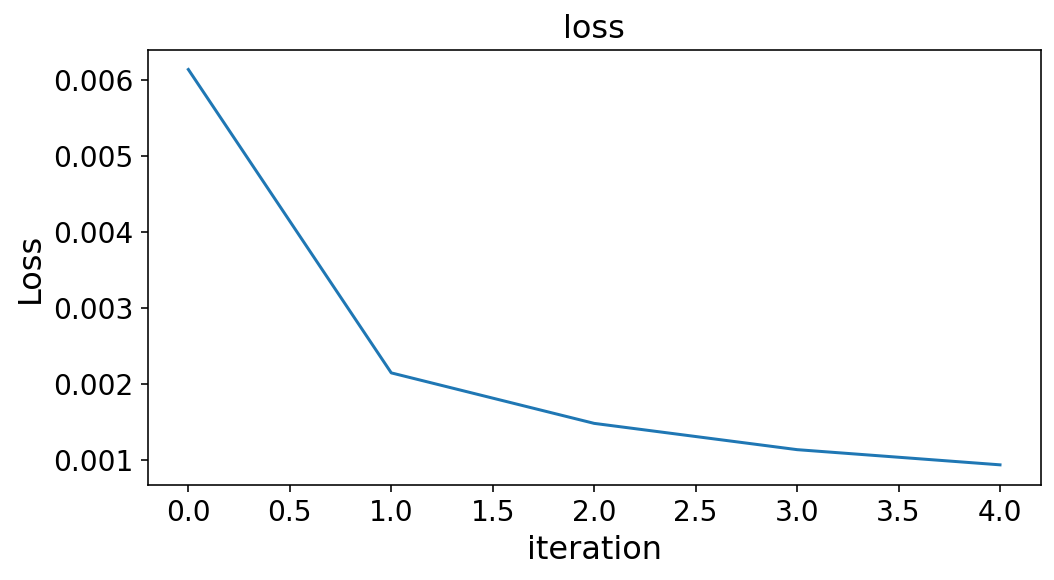

In [92]:
plt.figure(figsize=(8,4))
plt.plot(model_history_df['loss'])
plt.title('loss', fontsize=16)
plt.xlabel("iteration", fontsize=16), plt.ylabel("Loss", fontsize=16)
plt.xticks(fontsize=14), plt.yticks(fontsize=14)
plt.show()
# plt.savefig("plot_01_1_4classes_balanced_second_app.png")

We don't have validation here however by checking out the test data set we would be able to say if the model is good enough or not.

### Preparing test data set

In [85]:
# test_set.values
test_set_np = np.array(test_set)
# test_set_np
test_set_np = test_set_np.reshape(-1,1)
# test_set_np

In [86]:
# Scaling the test set
inputs = sc.fit_transform(test_set_np)

In [87]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(lags,(next_timestamps_test_num+lags)):
    X_test.append(inputs[i-lags:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_temp = regressor.predict(X_test)
predicted_temp = sc.inverse_transform(predicted_temp)

seperate the correct test data set and cut off the first 60 lags.

In [88]:
test_set_edited = test_set[61:]
test_set_edited.size

760

make sure that the data is in same format.

In [89]:
print(type(predicted_temp))
print(type(np.array(test_set_edited)))
test_set_edited_np = np.array(test_set_edited)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [168]:
# Some functions to help out with
# lstm source https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru
def plot_predictions(test, predicted):
    plt.figure(figsize=(16,8))
    plt.plot(test, 'r+',label='Test')
#     test.plot(kind='scatter')
    
    plt.plot(predicted, color='blue',label='Predicted')
    plt.title('LSTM model', fontsize=10)
    plt.xlabel('Timestamps', fontsize=10)
    plt.ylabel('Temperature c', fontsize=10)
    plt.xticks(fontsize=10), plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.ylim(0,30)
    
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

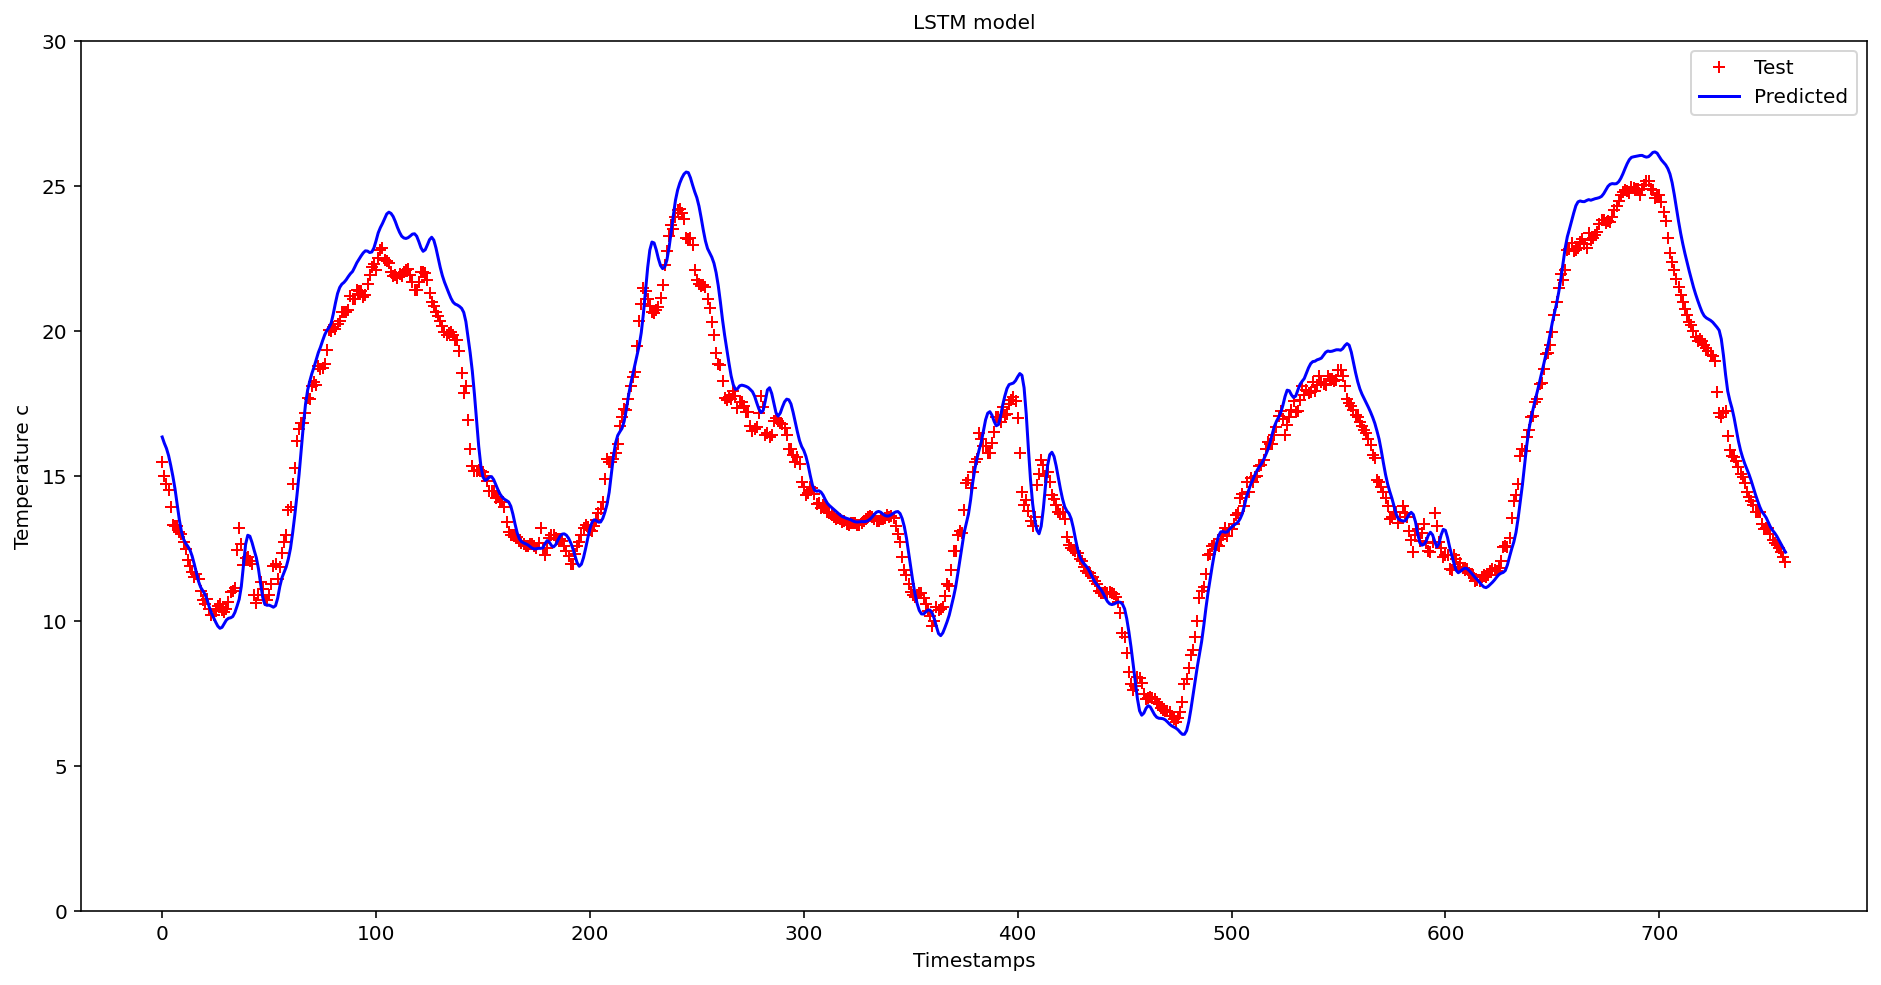

In [169]:
# Visualizing the results for LSTM
plot_predictions(test_set_edited_np,predicted_temp)

In [109]:
return_rmse(test_set_edited_np,predicted_temp)

The root mean squared error is 1.0802034829959355.


In [133]:
predicted_temp_reshape = np.reshape(predicted_temp, (760,))

In [130]:
test_set_edited_np.shape

(760,)

both test and predicted values are in same format and same shape.

In [140]:
test_part = test_set_edited_np[0:3]
test_part

array([15.47, 14.98, 14.7 ])

In [139]:
predicted_temp_reshape_part = predicted_temp_reshape[0:3]
predicted_temp_reshape_part

array([16.335608, 16.121368, 15.941689], dtype=float32)

### GIF visualization

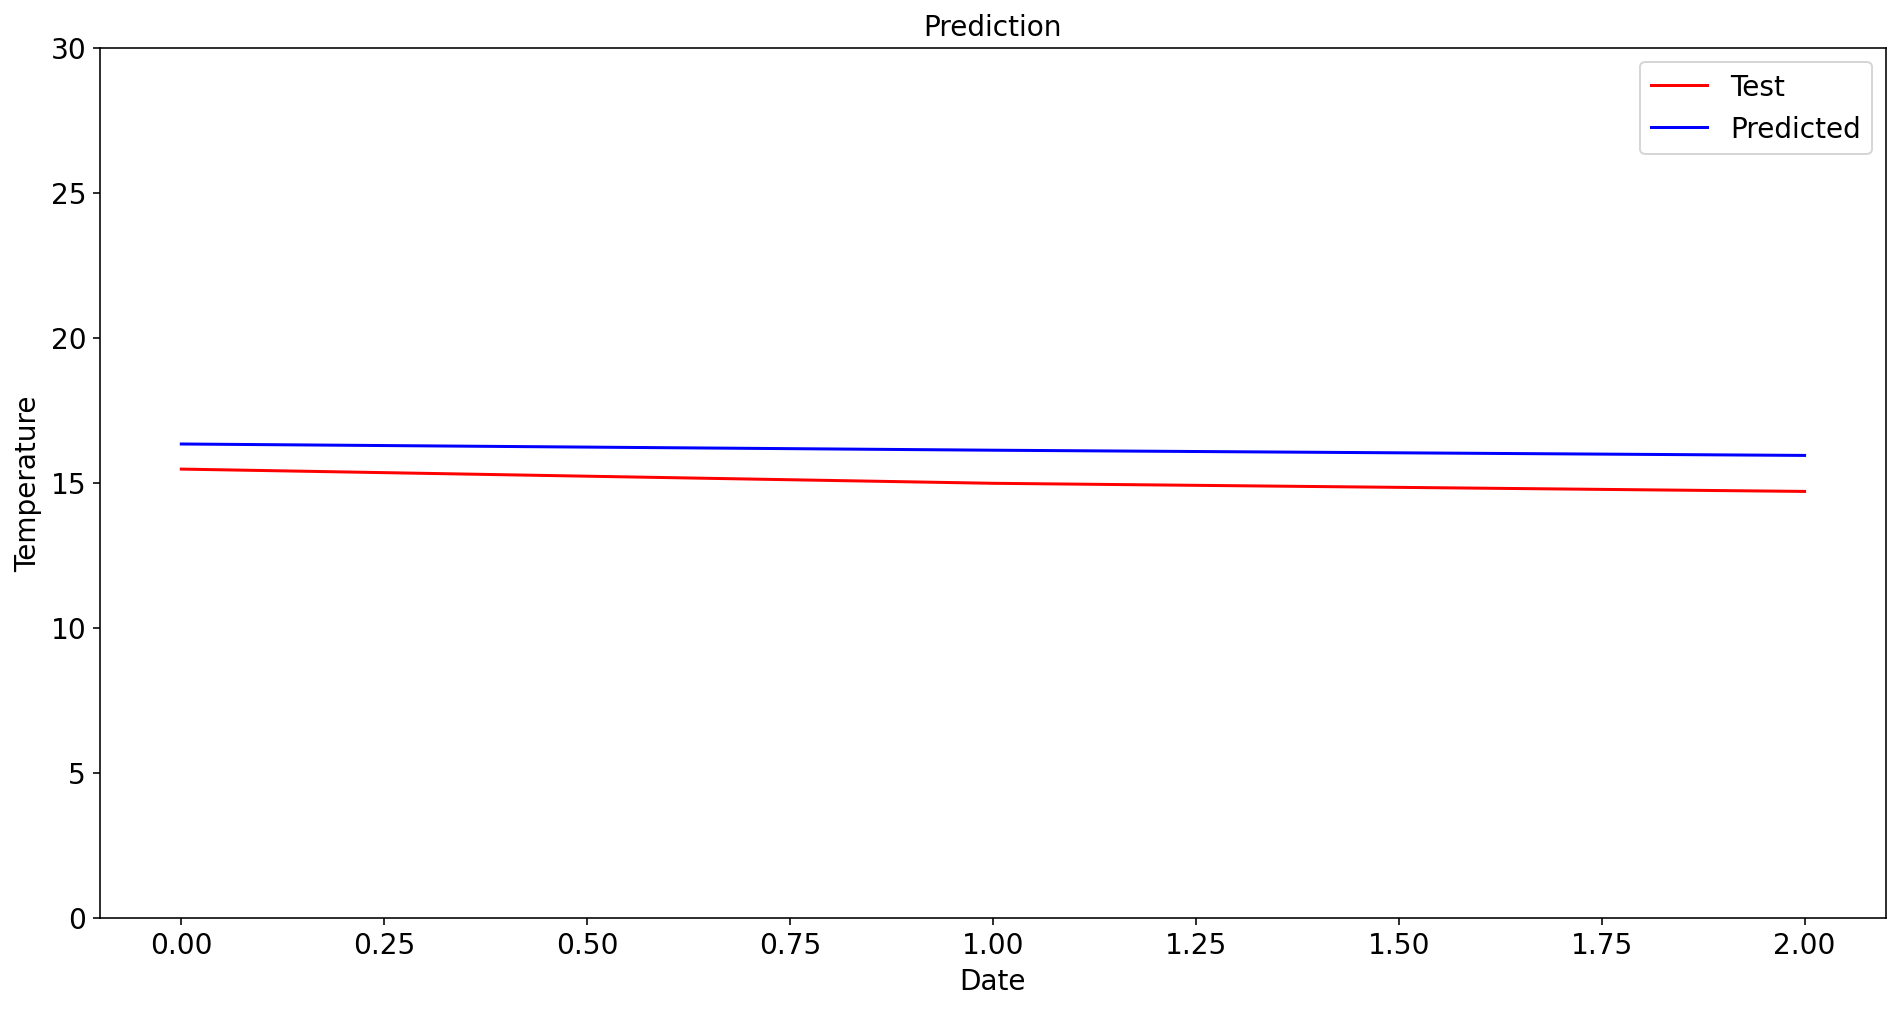

In [153]:
plot_predictions(test_part,predicted_temp_reshape_part)

In [170]:
# Some functions to help out with
# lstm source https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru
def plot_predictions(test, predicted):
    plt.figure(figsize=(16,8))
    plt.plot(test, 'r+',label='Test')
#     test.plot(kind='scatter')
    
    plt.plot(predicted, color='blue',label='Predicted')
    plt.title('LSTM model', fontsize=10)
    plt.xlabel('Timestamps', fontsize=10)
    plt.ylabel('Temperature c', fontsize=10)
    plt.xticks(fontsize=10), plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.ylim(0,30)

In [172]:
@gif.frame
def plott(i):
    
    test_part = test_set_edited_np[0:i]
    predicted_temp_reshape_part = predicted_temp_reshape[0:i]

    plot_predictions(test_part, predicted_temp_reshape_part)

frames = []    
for i in tqdm(range(0,761)):

    
    frame =  plott(i)
    frames.append(frame)

100%|█████████████████████████████████████████| 761/761 [02:13<00:00,  5.69it/s]


In [173]:
gif.save(frames, "../Figures/P03_02_LSTM_GIF.gif", duration=2)

well the resutls are good compare to the ARIMA and AR models. However the main question is if the any of these models can provide a good estimation for temperature 72 timestaps ahead? 


As it was mentioned before the classical methods are good for short-term forecasting and they tend to converge to the mean for long-term forecasting. However this is not the case for ML and DL models. 

the LSTM or any deep net is like a big fitting machine. The LSTM used here has more than 17000 parameters which provides LSTM model with large room to fit the data. The LSTM special architecture (gates, memories, etc) makes it able to memorize a series of past events and use it for future prediction.

The ARIMA and AR models are univariate models, unlike the ML algorithms which can work with several inputs and outputs. Being able to take several parameters as inputs makes ML's and DL's powerful tools.
ML algorithms and Deep net can be applied simply for prediction any number of timestamps ahead unlike the ARIMA and AR libraries which make users limited to one timestamp ahead prediction.

In the Next Part, I will use LSTM with several inputs (multivariate) for temperature estimation.